In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np


In [2]:
df=pd.read_csv('TSLA.csv.xls')

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500


In [4]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2946,2022-03-11,840.200012,843.799988,793.770020,795.349976,795.349976,22272800
2947,2022-03-14,780.609985,800.700012,756.039978,766.369995,766.369995,23717400
2948,2022-03-15,775.270020,805.570007,756.570007,801.890015,801.890015,22280400
2949,2022-03-16,809.000000,842.000000,802.260010,840.229980,840.229980,28009600
2950,2022-03-17,830.989990,875.000000,825.719971,871.599976,871.599976,22194300
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2955,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2951    False
2952    False
2953    False
2954    False
2955    False
Length: 2956, dtype: bool

In [8]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [9]:
df = df.dropna()

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month']=df['Date'].dt.month


In [11]:
df['Year'].tail(20)

2936    2022
2937    2022
2938    2022
2939    2022
2940    2022
2941    2022
2942    2022
2943    2022
2944    2022
2945    2022
2946    2022
2947    2022
2948    2022
2949    2022
2950    2022
2951    2022
2952    2022
2953    2022
2954    2022
2955    2022
Name: Year, dtype: int32

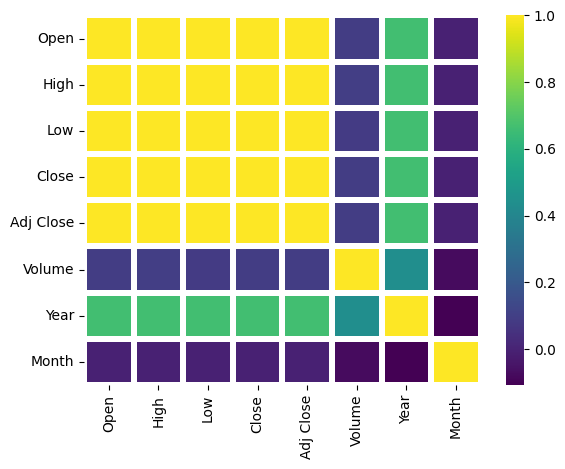

In [12]:
df_corr=df.drop(columns=['Date'],axis=1)

df_corr


CORRELATION_DF=df_corr.corr()
sns.heatmap(data=CORRELATION_DF,linewidths=4,cmap='viridis')
plt.show()

<Axes: >

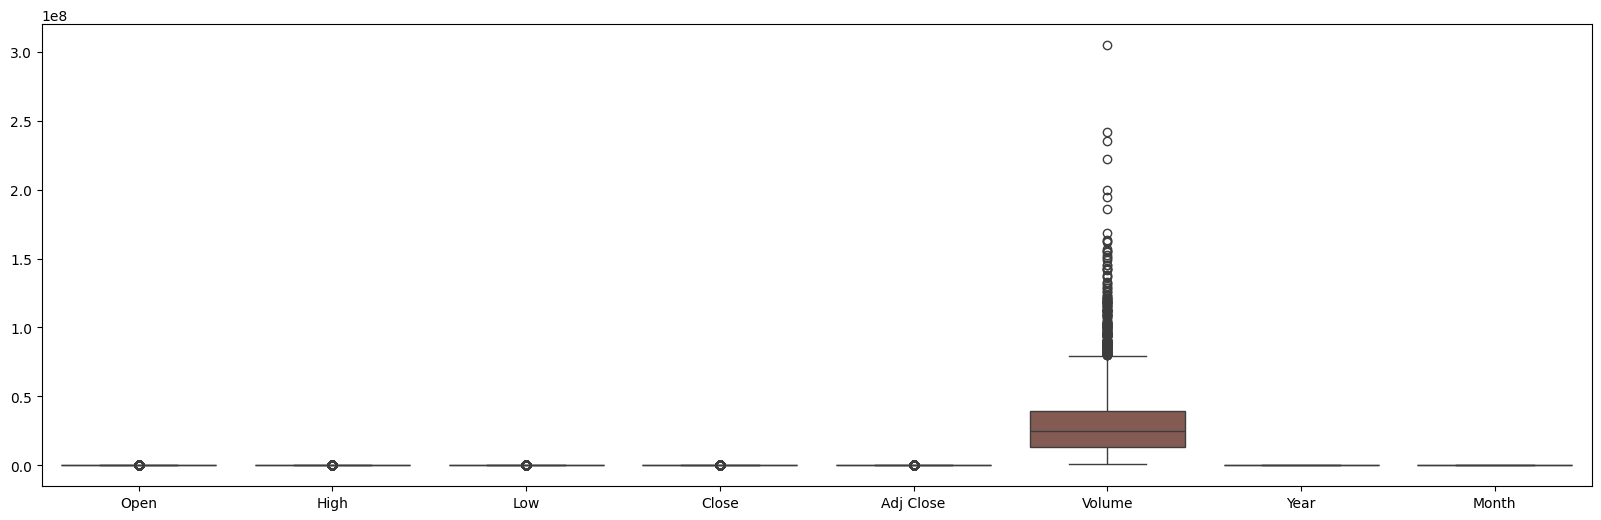

In [13]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df)

In [14]:
lower_bound=df['Volume'].quantile(0.05)
upper_bound=df['Volume'].quantile(0.95)

df['Volume']=df['Volume'].clip(lower=lower_bound,upper=upper_bound)


<Axes: >

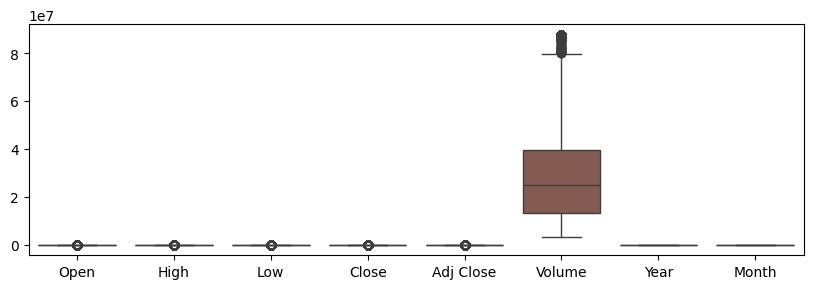

In [15]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df)

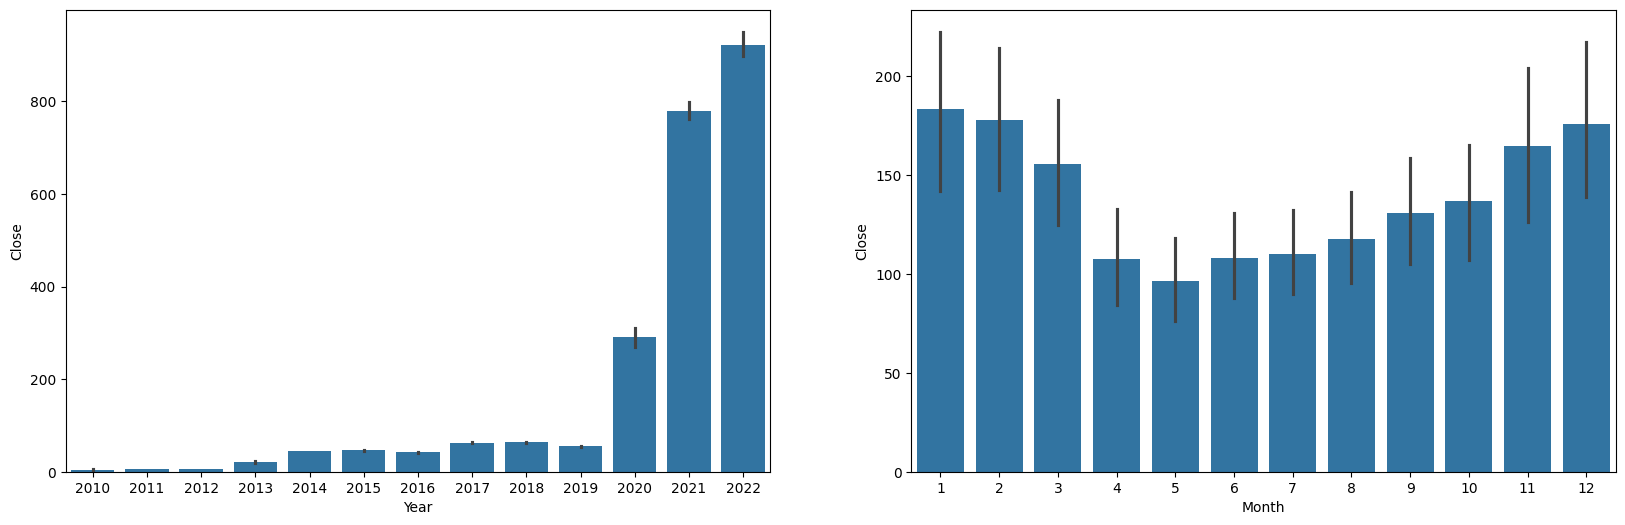

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)

sns.barplot(x=df['Year'],y=df['Close'])



plt.subplot(1,2,2)

sns.barplot(x=df['Month'],y=df['Close'])

plt.show()




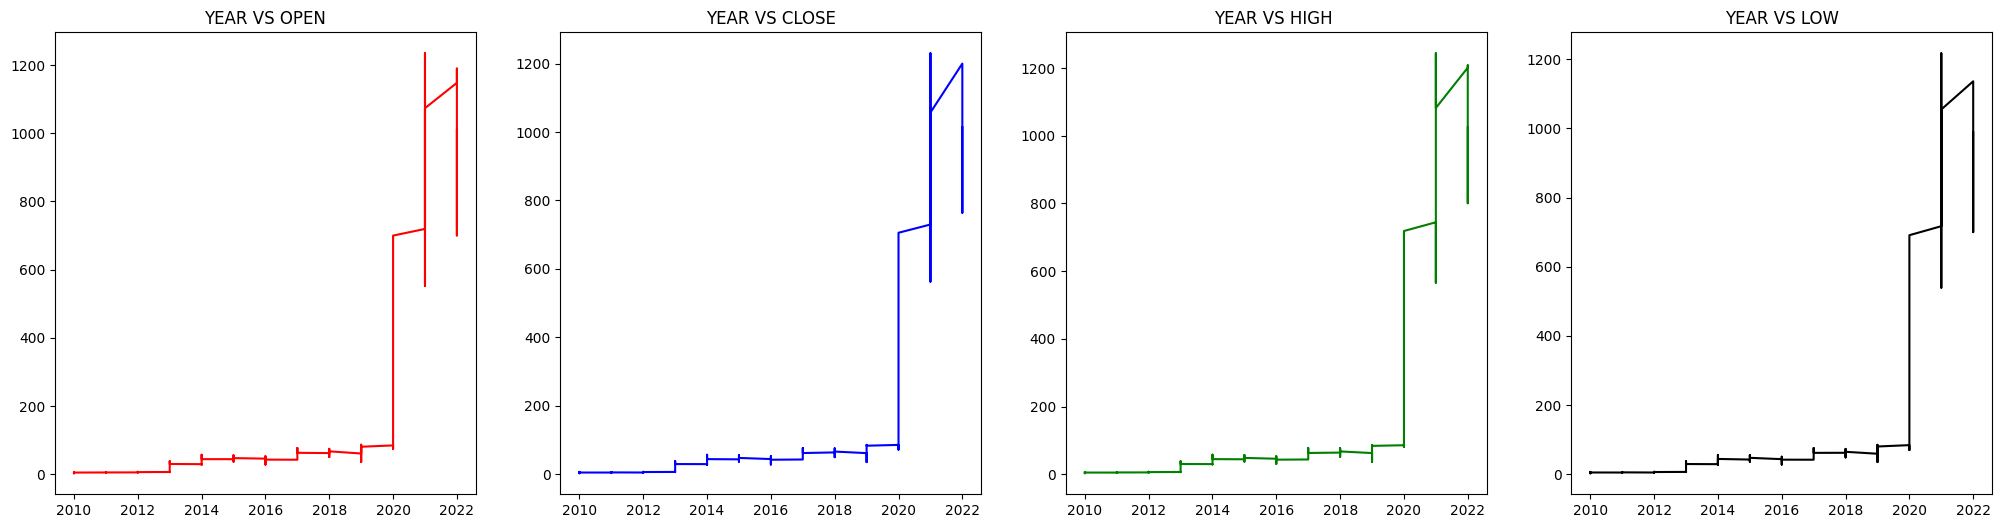

In [17]:
plt.figure(figsize=(25,6))

plt.subplot(1,4,1)
plt.plot(df['Year'],df['Open'],color='red')
plt.title('YEAR VS OPEN')

plt.subplot(1,4,2)
plt.plot(df['Year'],df['Close'],color='blue')
plt.title('YEAR VS CLOSE')

plt.subplot(1,4,3)
plt.plot(df['Year'],df['High'],color='green')
plt.title('YEAR VS HIGH ')



plt.subplot(1,4,4)
plt.plot(df['Year'],df['Low'],color='black')
plt.title('YEAR VS LOW')

plt.show()





Text(0.5, 1.0, 'VOLUMNE VS YEAR')

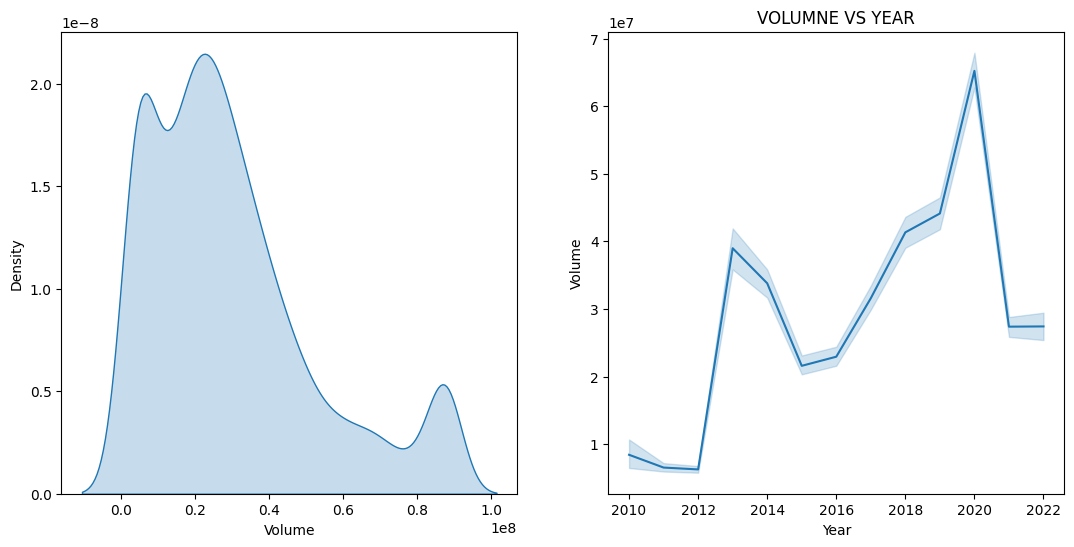

In [18]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.kdeplot(x=df['Volume'],fill=True)


plt.subplot(1,3,2)
sns.lineplot(y=df['Volume'],x=df['Year'])
plt.title('VOLUMNE VS YEAR')



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` be

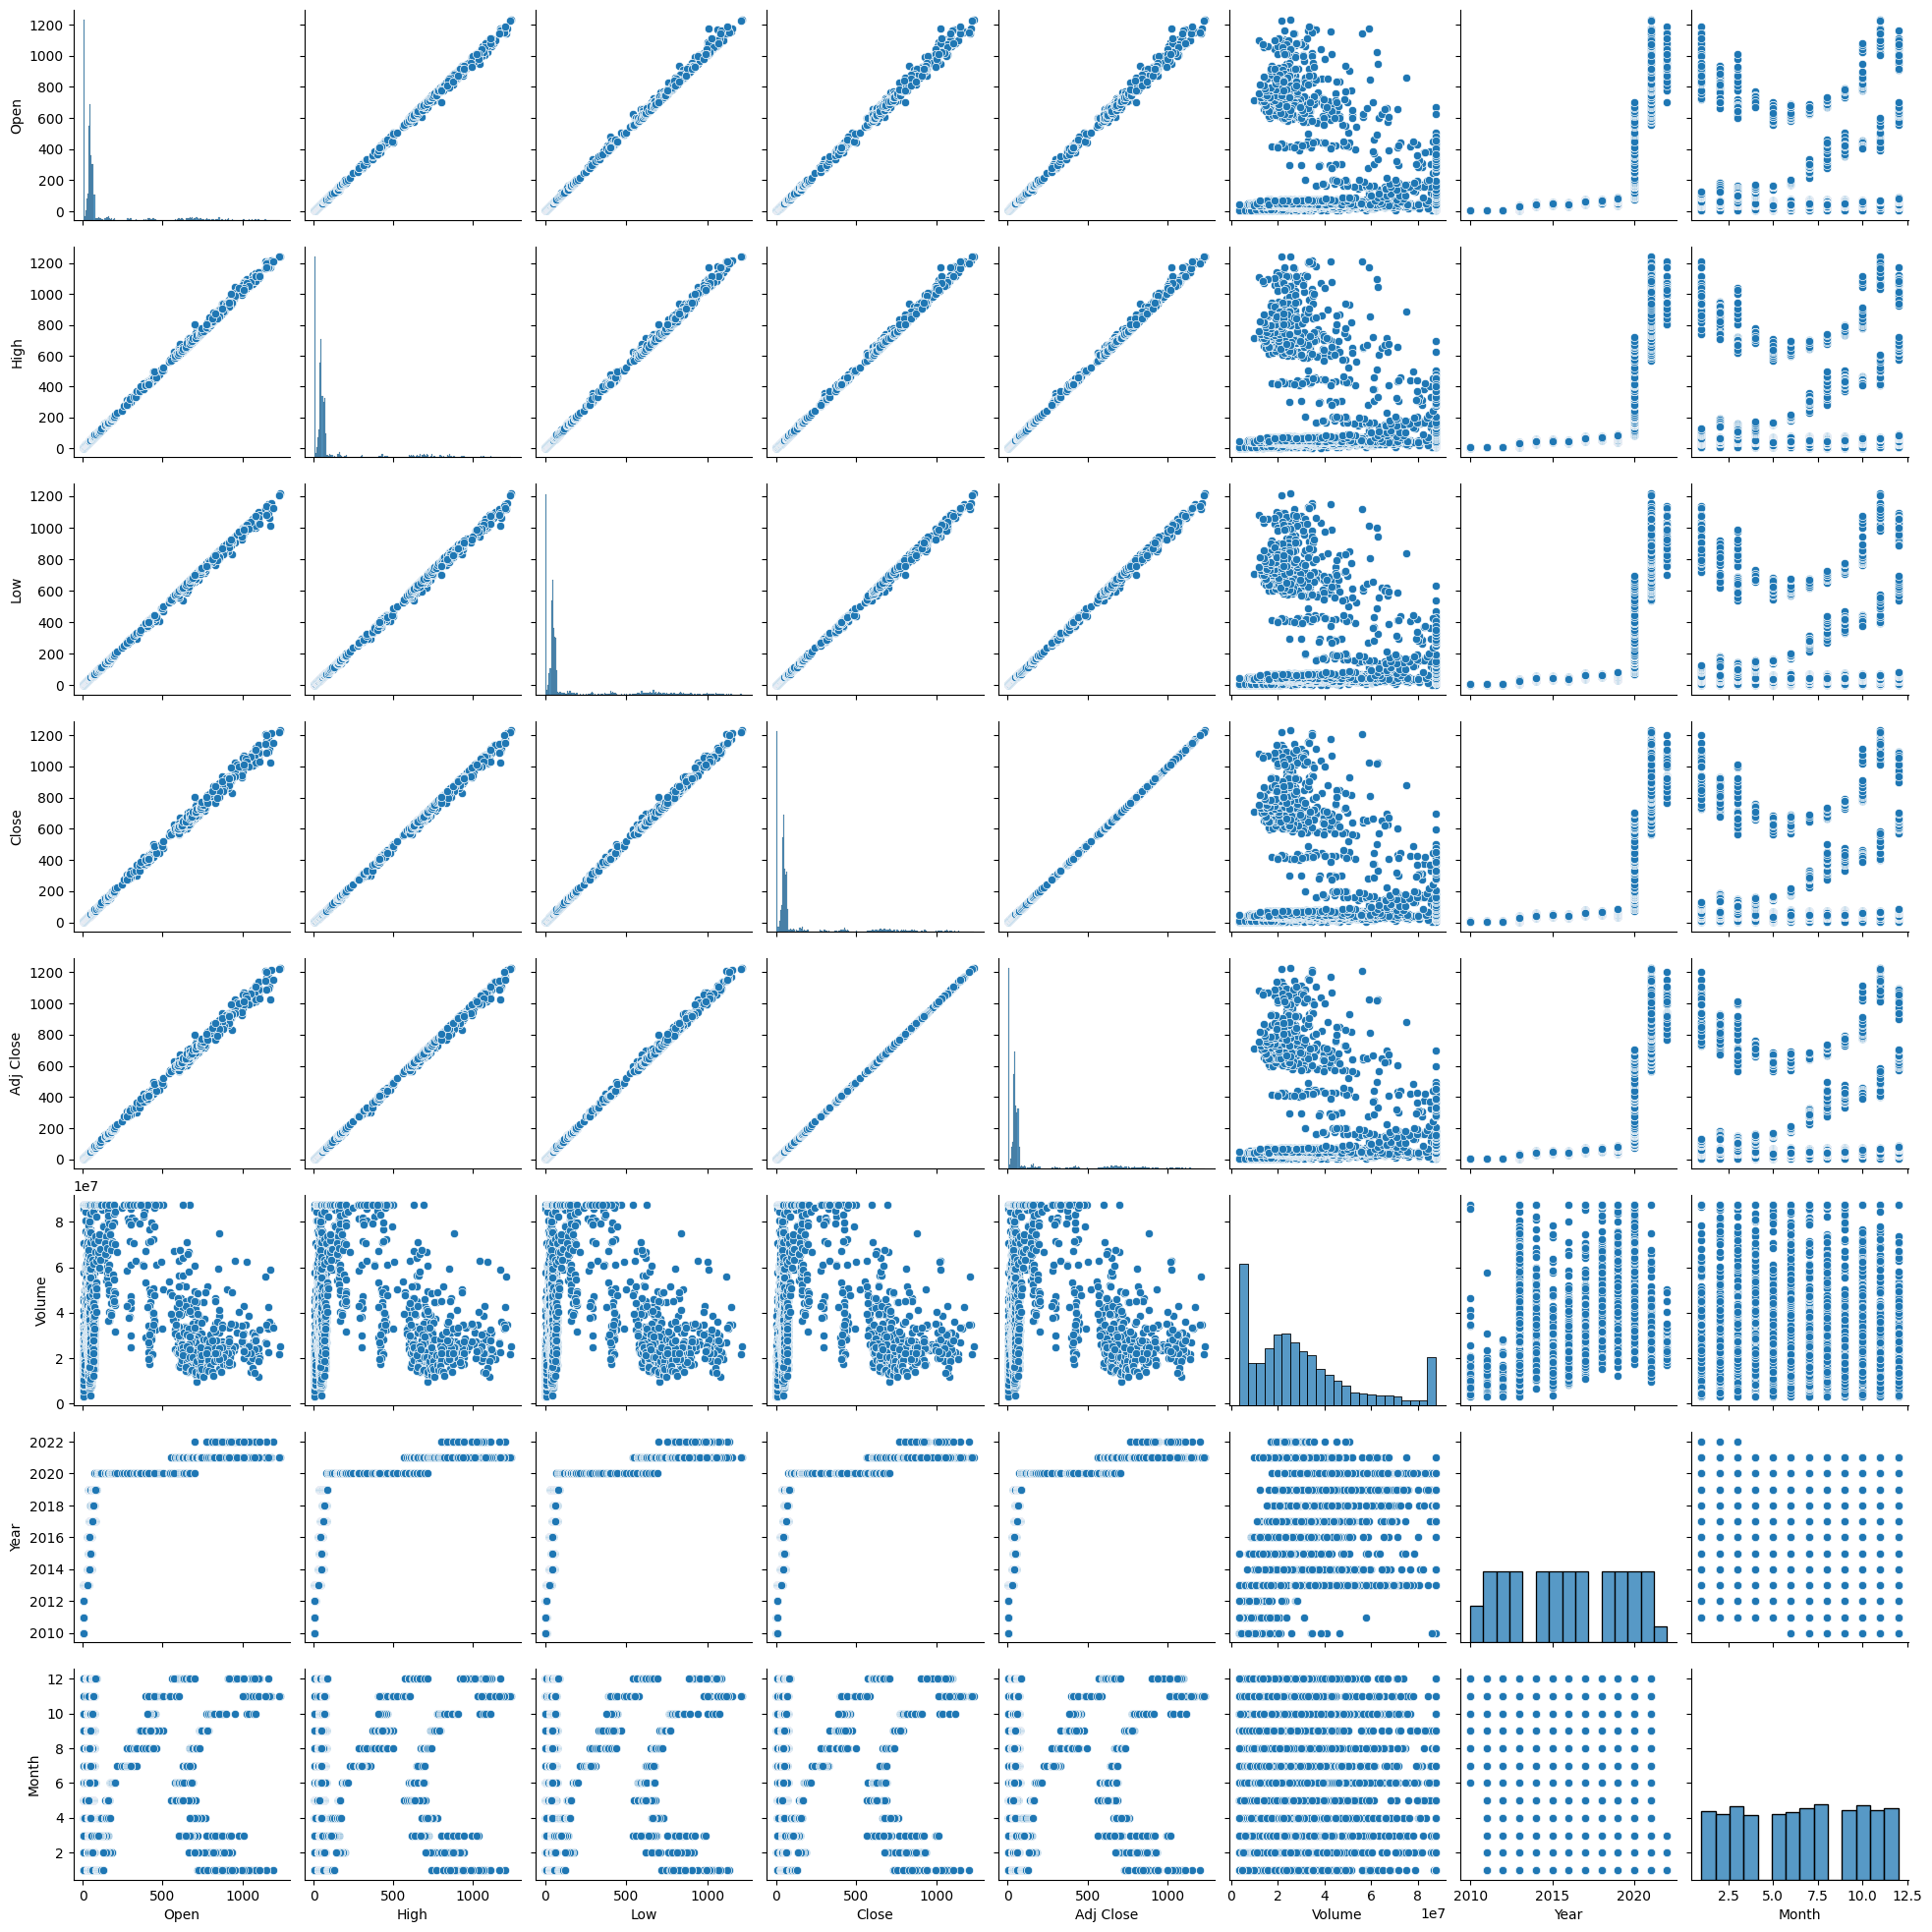

In [19]:
sns.pairplot(data=df,palette='RED')
plt.show()

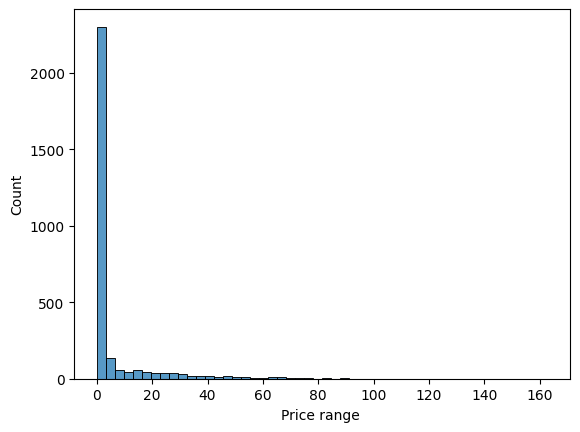

In [20]:
df['Price range ']=df['High']-df['Low']

sns.histplot(data=df['Price range '],bins=50)
plt.show()

In [21]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Price range
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,87655700,2010,6,1.492
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,2010,6,1.424
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,2010,7,1.130
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2010,7,0.878
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,2010,7,0.834
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500,2010,7,0.330
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000,2010,7,0.390
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000,2010,7,0.270
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500,2010,7,0.214
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500,2010,7,0.348


In [22]:
df['Day']=df['Date'].dt.day

In [23]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Price range,Day
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,87655700,2010,6,1.492,29
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,2010,6,1.424,30
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,2010,7,1.130,1
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2010,7,0.878,2
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,2010,7,0.834,6
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500,2010,7,0.330,7
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000,2010,7,0.390,8
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000,2010,7,0.270,9
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500,2010,7,0.214,12
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500,2010,7,0.348,13


In [26]:
X=df.drop(columns=['Close','Date','Price range '],axis=1)
Y=df['Close']
featues_df=X.columns



In [27]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=10)
model.fit(X,Y)

DecisionTreeRegressor(random_state=10)

In [28]:
from sklearn.feature_selection import RFE
rfe_model=RFE(model,n_features_to_select=7)
fit=rfe_model.fit(X,Y)

print(fit.support_)
print(fit.ranking_)


SELECTED_FEATUES=[featues_df[i] for i in range(len(featues_df)) if fit.support_[i]]

featues_df_names=pd.DataFrame({'FEATURES NAMES':SELECTED_FEATUES})

featues_df_names



[ True  True  True  True  True False  True  True]
[1 1 1 1 1 2 1 1]


,FEATURES NAMES
0,Open
1,High
2,Low
3,Adj Close
4,Volume
5,Month
6,Day


/var/folders/b3/3yzhdb7s4nz7k_52dth9bqz40000gn/T/ipykernel_77521/153902639.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fea_df['Features'], y=fea_df['Importance'], palette='viridis')


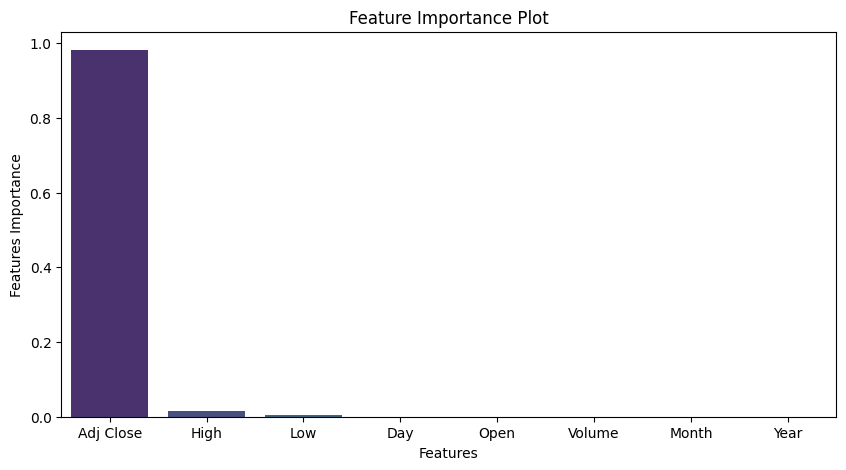

In [29]:

fea_imp = model.feature_importances_
names = X.columns


fea_df = pd.DataFrame({'Features': names,
                       'Importance': fea_imp})


fea_df = fea_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 5))
sns.barplot(x=fea_df['Features'], y=fea_df['Importance'], palette='viridis')
plt.xlabel("Features")
plt.ylabel("Features Importance")
plt.title("Feature Importance Plot")
plt.show()
